# Import some packages

You should load packages you may need in this project first

In [1]:
import skimage.io as io
import skimage.color
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
from keras.utils import np_utils

# Load character data from the dataset subfolder


In [2]:
# provide your code here
DATASET_DIR = "./dataset/"
classes = os.listdir(DATASET_DIR)
print(classes)
data = []
for cls in classes:
    files = os.listdir(DATASET_DIR + cls)
    for f in files:
        img_path = DATASET_DIR + cls + "/" + f
#         display(img_path)
#         break
        img = skimage.io.imread(img_path, as_gray=True)
        
#         display(img.shape)
        
        # change the picture to the gray scale
#         img = skimage.color.rgb2gray(img)
        
        data.append({
            'x': img,
            'y': cls
        })
        
random.shuffle(data) 


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '云', '京', '冀', '吉', '宁', '川', '新', '晋', '桂', '沪', '津', '浙', '渝', '湘', '琼', '甘', '皖', '粤', '苏', '蒙', '藏', '豫', '贵', '赣', '辽', '鄂', '闽', '陕', '青', '鲁', '黑']


(20, 20)

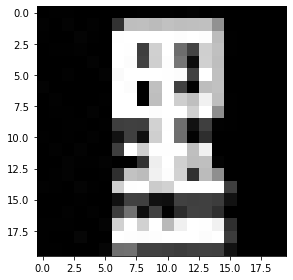

In [3]:
# display the image after reading
# display(img)
display(img.shape)
io.imshow(img);

# create train data set and test data set 
Using 80/20 rule, 80 precent for trainning, and 20 percent for testing.

In [5]:
def getRandomIndex(n, x):
    # the index is from 0 to n, not included n, and the index is not replace
    index = np.random.choice(np.arange(n), size=x, replace=False)
    return index

In [6]:
X = [d['x'] for d in data]
y = [d['y'] for d in data]

ys = list(np.unique(y))
y = [ys.index(v) for v in y]

# generate random index
train_index = getRandomIndex(len(X),int(len(X)*0.8))
test_index = np.delete(np.arange(len(X)), train_index)

x_train = [X[i] for i in train_index.tolist()]
y_train = [y[i] for i in train_index.tolist()]

x_test = [X[i] for i in test_index.tolist()]
y_test = [y[i] for i in test_index.tolist()]


# Examming and Understand data set for trainning


In [7]:
# you may print out some infomation about train data set 
# print(x_train[0])
# print(y_train)
print(len(y_train))

12920


# Decide a few parameters for trainning

such as batch size, epochs, image size in rows and colomns, etc.

In [8]:
# you decide those parameters below

# after the batch_size input, the weight will be updated
batch_size = 128
num_classes = len(ys)
epochs =  25

## input image dimensions
img_rows, img_cols = x_train[0].shape
label_type_num = len(ys)

In [9]:
#Extend the data chennels to 4 dimemsions
display(len(x_train))

12920

In [10]:
def extend_channel(data):
    if K.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        
    return data

x_train = extend_channel(np.array(x_train))
x_test = extend_channel(np.array(x_test))

# Data normalization

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#TODO
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [30]:
input_shape = x_train.shape[1:]
display(x_train.shape)
display(y_train.shape)
display(input_shape)
display(x_test.shape)
display(y_test.shape)

(12920, 20, 20, 1)

(12920, 65)

(20, 20, 1)

(3231, 20, 20, 1)

(3231, 65)

In [29]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Create a CNN model for character recognition

This is an important part of this project. You have to create a cnn model using tensorflow and keras to train the data.


In [27]:
#You can refer to the LeNet on the project 4
# or use the same sample model in carplate_recognition.ipynb
import tensorflow as tf

# make a new model for sequential
model = Sequential()

# Layer 1: Convolutional.
model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 activation='relu',
                 input_shape=input_shape))
# # Pooling
# model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout
model.add(Dropout(0.25))

# Flattem for fully connected
model.add(Flatten())

# Layer 3: Fully Connected
model.add(Dense(128, activation='relu'))

# Dropout
model.add(Dropout(0.2))

# Layer 4: Fully Connected
model.add(Dense(label_type_num, activation='softmax'))

In [14]:
# model = Sequential()
# model.call = tf.function(model.call)
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))

# Compile the model

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                        

In [16]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(12920, 20, 20, 1)

(12920, 65)

(3231, 20, 20, 1)

(3231, 65)

# Train your model


In [18]:
# intitial test
batch_size = 128
epochs =  25

if_load = False
if(if_load):
    model.load_weights("char_cnn.h5")

model_test = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_freq=1, validation_split=0.2)
score = model.evaluate(x_test, y_test)
print("Loss:",score[0])
print("Acc:", score[1])

Epoch 1/25
82/82 [==============================] - 9s 101ms/step - loss: 1.6141 - accuracy: 0.6368 - val_loss: 0.3590 - val_accuracy: 0.9129
Epoch 2/25
82/82 [==============================] - 10s 128ms/step - loss: 0.3357 - accuracy: 0.9191 - val_loss: 0.1787 - val_accuracy: 0.9594
Epoch 3/25
82/82 [==============================] - 9s 112ms/step - loss: 0.2036 - accuracy: 0.9516 - val_loss: 0.1593 - val_accuracy: 0.9667
Epoch 4/25
82/82 [==============================] - 9s 114ms/step - loss: 0.1405 - accuracy: 0.9643 - val_loss: 0.1254 - val_accuracy: 0.9733
Epoch 5/25
82/82 [==============================] - 9s 109ms/step - loss: 0.1072 - accuracy: 0.9725 - val_loss: 0.1205 - val_accuracy: 0.9760
Epoch 6/25
82/82 [==============================] - 9s 106ms/step - loss: 0.0848 - accuracy: 0.9767 - val_loss: 0.1149 - val_accuracy: 0.9748
Epoch 7/25
82/82 [==============================] - 8s 101ms/step - loss: 0.0705 - accuracy: 0.9800 - val_loss: 0.1151 - val_accuracy: 0.9760
Epoch

# Visualize training results

In [19]:
epochs_range = range(epochs)
acc = model_test.history['accuracy']
val_acc = model_test.history['val_accuracy']
loss = model_test.history['loss']
val_loss = model_test.history['val_loss']

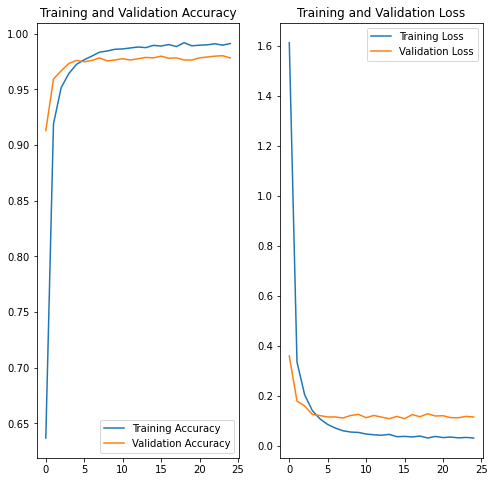

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evaluation 

Evaluate your model with test dataset.

make sure your model accuracy should be more than 97 percent. Otherwise, you have to go back to fine tune your model with whatever methods you have learned to improve its accuracy. You have to handle over-fitting or under-fitting problem you may encounter.

In [21]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

101/101 [==============================] - 1s 8ms/step - loss: 0.0773 - accuracy: 0.9830
Test loss: 0.07728289812803268
Test accuracy: 0.9829773902893066


# Save your model weights

You should save your model for car plate recognition purpose later.


In [23]:
# when you finish training, you should save your model in a file
# for carplate_recognition.ipynb
# since it will use this model to recognize car plates 
model.save_weights('char_cnn_get.h5')